In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [20]:
data_X = pd.read_csv('x_train.csv')
data_X['date']=pd.to_datetime(data_X['date'])
data_y = pd.read_csv('y_train.csv')
data_X['y']=data_y['y']
data_X.set_index(['date'])

,station,job,ferie,vacances,y
date,,,,,
2015-01-01,1J7,1,1,1,7
2015-01-01,O2O,1,1,1,0
2015-01-01,8QR,1,1,1,9
2015-01-01,UMC,1,1,1,9
2015-01-01,FK3,1,1,1,28
...,...,...,...,...,...
2022-12-31,V2P,0,0,1,1227
2022-12-31,N9K,0,0,1,544
2022-12-31,P6E,0,0,1,92


,station,job,ferie,vacances,y
date,,,,,
2015-01-01,XTG,1,1,1,1535
2016-01-01,XTG,1,1,1,1889
2017-01-01,XTG,0,1,1,1700
2018-01-01,XTG,1,1,1,1741
2019-01-01,XTG,1,1,1,2028
...,...,...,...,...,...
2018-12-31,XTG,1,0,1,5940
2019-12-31,XTG,1,0,1,22
2020-12-31,XTG,1,0,1,6218


<AxesSubplot: xlabel='date'>

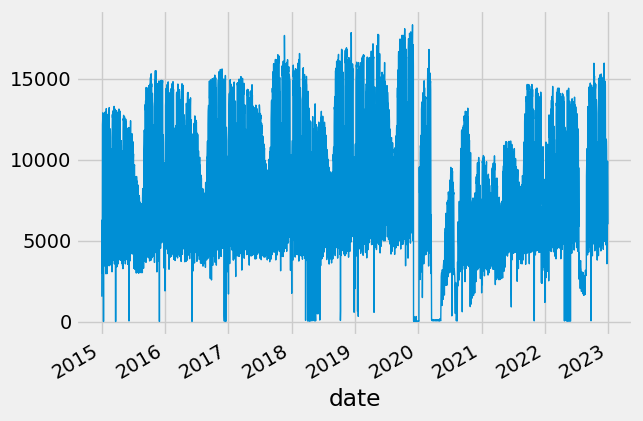

In [44]:
station = data_X[data_X['station']=='XTG']
station = station.set_index(['date'])
display(station)
station = station[(station.index.year >= 2015) & (station.index.year <= 2022)]
station['y'].plot(linewidth = 1)

<AxesSubplot: xlabel='date'>

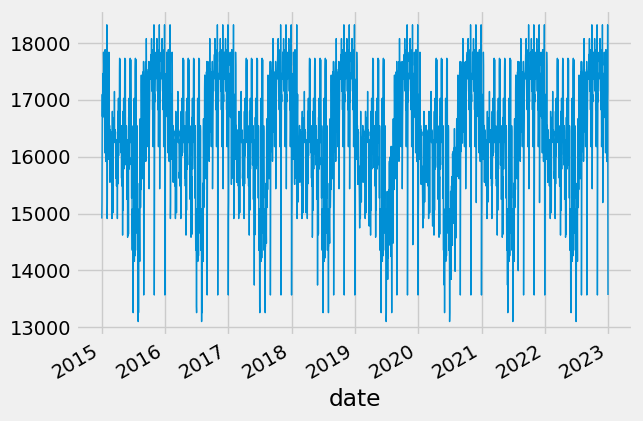

In [46]:
station_roll = station['y'].rolling(window = 30, center = True,min_periods=15).max()
station_roll.plot(linewidth=1)